# Undersampling method approach

In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification as mkc
from imblearn.under_sampling import NearMiss
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

data = pd.read_csv('/Users/abhiishekchugh/Documents/GitHub/CANN-for-Fraud-Detection/Automobile Insurance/data/pre-processing done/Pre-Processed-Encoded_Chugh.csv')


Shape of X: (15420, 97)
Shape of y: (15420, 1)


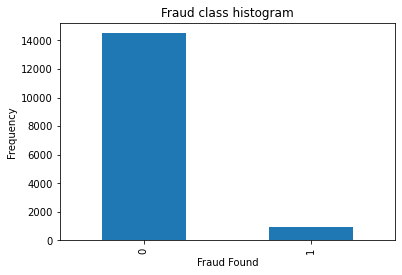

In [2]:
#plotting number of Fraud and non-Fraud
pd.value_counts(data['FraudFound']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Fraud Found')
plt.ylabel('Frequency')
data['FraudFound'].value_counts()

X = np.array(data.iloc[:, data.columns != 'FraudFound'])
y = np.array(data.iloc[:, data.columns == 'FraudFound'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

## Undersampling Step

In [3]:
undersample = NearMiss(version=3, n_neighbors=3)
X_train_res, y_train_res = undersample.fit_resample(X, y)

# X_train_res, y_train_res = mkc(n_samples=10794, n_features=98, n_redundant=0, random_state=1)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.3, random_state=42)

print("Number policies X_train dataset: ", X_train.shape)
print("Number policies  y_train dataset: ", y_train.shape)
print("Number policies  X_test dataset: ", X_test.shape)
print("Number policies  y_test dataset: ", y_test.shape)

print("Before UnderSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train==0)))
# data.columns.size

Number policies X_train dataset:  (1292, 97)
Number policies  y_train dataset:  (1292,)
Number policies  X_test dataset:  (554, 97)
Number policies  y_test dataset:  (554,)
Before UnderSampling, counts of label '1': 644
Before UnderSampling, counts of label '0': 648 



## Plotting the undersampled data selected using NearMiss version=2

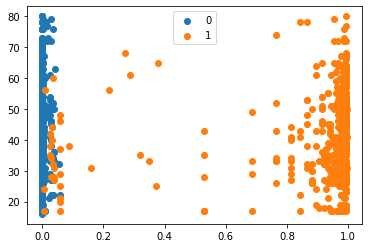

In [5]:
counter = Counter(y_train)

# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(y_train == label)[0]
    plt.scatter(X_train[row_ix, 0], X_train[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [6]:
print('After UnderSampling, the shape of train_X: {}'.format(X_train.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After UnderSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After UnderSampling, counts of label '0': {}".format(sum(y_train==0)))

After UnderSampling, the shape of train_X: (1292, 97)
After UnderSampling, the shape of train_y: (1292,) 

After UnderSampling, counts of label '1': 644
After UnderSampling, counts of label '0': 648


## Logistic Regression Classifier initialization

In [7]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

lr = LogisticRegression(max_iter=10000,random_state=42)
# lr.fit(X_train_res, y_train_res)
lr.fit(X_train,y_train.ravel())



LogisticRegression(max_iter=10000, random_state=42)

## Random Forest Classifier initialization

In [8]:
# creating a Random Forest classifier
rf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
rf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = rf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.9981949458483754


## Confusion matrix plotting function

In [9]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the train dataset: 99.84472049689441%


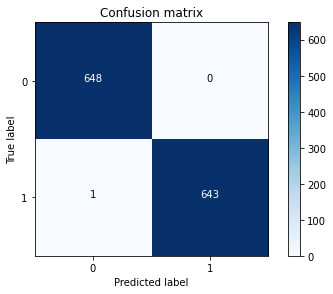

In [10]:
y_train_pre = lr.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

Recall metric in the testing dataset: 99.6415770609319%


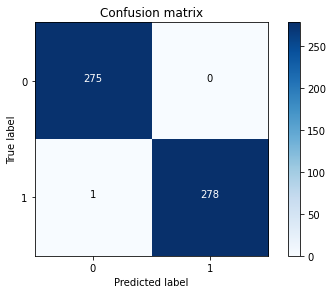

In [11]:

y_pred = lr.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

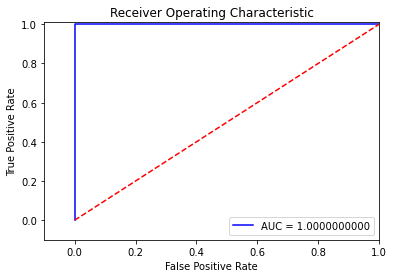

1.0

In [15]:

# tmp = lr.fit(X_train_res, y_train_res.ravel())
tmp = lr.fit(X_train, y_train.ravel())

y_pred_sample_score = tmp.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.10f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

roc_auc

In [ ]:
s